In [58]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from pandas import read_csv
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import History 
from sklearn.model_selection import RandomizedSearchCV
history = History()
import pandas as pd

In [59]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()
x_train=x_train.reshape(60000, 784)
x_test=x_test.reshape(10000, 784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/ 255.0
x_test=x_test / 255.0


In [23]:
Y_train= to_categorical(y_train, 10)
Y_test= to_categorical(y_test, 10)
def create_model(optimizer="adam", activation="relu", dropout=0.2):
    
    model=keras.Sequential()

    model.add(Dense(512, input_shape=(784,), activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(512, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(512, activation=activation))
    model.add(Dropout(dropout))


    model.add(Dense(10, activation='softmax'))



    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=["accuracy"]
        

        )
    return model
model = KerasClassifier(build_fn=create_model)
#define the grid search parameter
batch_size = [80, 120, 160, 180, 220]
optimizer = ["SGD", "adam", "RMSprop", "Adadelta"]
dropout = [0.0, 0.1, 0.2, 0.3]
activation = ['relu', 'sigmoid', 'tanh', 'hard_sigmoid']
#creating a Dictionary
param_grid = dict(batch_size=batch_size, optimizer=optimizer, dropout=dropout, activation =activation )

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv= 10, return_train_score=True, n_jobs=-1)
grid_result = grid.fit(x_train, Y_train)








334/334 [==============================] - 15s 44ms/step - loss: 0.2258 - accuracy: 0.9334


In [78]:
df_cv_results = pd.DataFrame(grid_result.cv_results_)
train_scores_mean = df_cv_results['mean_train_score']
valid_scores_mean = df_cv_results['mean_test_score']
train_scores_std = df_cv_results['std_train_score']
valid_scores_std = df_cv_results['std_test_score']

param_cols = [c for c in df_cv_results.columns if c[:6] == 'param_']
param_cols[0]='param_optimizer'
param_cols[1]='param_dropout'
param_cols[2]='param_batch_size'
param_cols[3]='param_activation'
param_ranges = [grid.param_grid[p[0:]] for p in param_cols]
param_ranges_lengths = [len(pr) for pr in param_ranges]


train_scores_mean = np.array(train_scores_mean).reshape(*param_ranges_lengths)
valid_scores_mean = np.array(valid_scores_mean).reshape(*param_ranges_lengths)
train_scores_std = np.array(train_scores_std).reshape(*param_ranges_lengths)
valid_scores_std = np.array(valid_scores_std).reshape(*param_ranges_lengths)


param_to_vary_idx=param_grid
print(param_to_vary_idx)
slices = []
for idx, param in enumerate(grid.best_params_):
    
    if (idx == param_to_vary_idx):
        slices.append(slice(None))
        continue
    best_param_val = grid.best_params_[param]
    idx_of_best_param = 0
    if isinstance(param_ranges[idx], np.ndarray):
        idx_of_best_param = param_ranges[idx].tolist().index(best_param_val)
    else:
        idx_of_best_param = param_ranges[idx].index(best_param_val)
    slices.append(idx_of_best_param)

train_scores_mean = train_scores_mean[tuple(slices)]
valid_scores_mean = valid_scores_mean[tuple(slices)]
train_scores_std = train_scores_std[tuple(slices)]
valid_scores_std = valid_scores_std[tuple(slices)]

plt.clf()

plt.title(title)
plt.xlabel(param_to_vary)
plt.ylabel('Score')

if (ylim is None):
    plt.ylim(0.0, 1.1)
else:
    plt.ylim(*ylim)

if (not (xlim is None)):
    plt.xlim(*xlim)

lw = 2

plot_fn = plt.plot
if log:
    plot_fn = plt.semilogx
param_range = param_ranges[param_to_vary_idx]
if (not isinstance(param_range[0], numbers.Number)):
    param_range = [str(x) for x in param_range]
plot_fn(param_range, train_scores_mean, label='Training score', color='r',
        lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1,
                    color='r', lw=lw)
plot_fn(param_range, valid_scores_mean, label='Cross-validation score',
            color='b', lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1,
                     color='b', lw=lw)

plt.legend(loc='lower right')

plt.show()

{'param_batch_size': [80, 120, 160, 180, 220], 'param_optimizer': ['SGD', 'adam', 'RMSprop', 'Adadelta'], 'param_dropout': [0.0, 0.1, 0.2, 0.3], 'param_activation': ['relu', 'sigmoid', 'tanh', 'hard_sigmoid']}


ValueError: 'relu' is not in list

In [24]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, random_state=1)
Y_train= to_categorical(Y_train, 10)
Y_test= to_categorical(Y_test, 10)
print(x_train.shape, x_test.shape, Y_train.shape, Y_test.shape)
x_train=x_train.reshape(46900, 784)
x_test=x_test.reshape(23100, 784)
print(x_train.shape, x_test.shape, Y_train.shape, Y_test.shape)

Best: 0.963883 using {'activation': 'relu', 'batch_size': 180, 'dropout': 0.0, 'optimizer': 'adam'}
(46900, 28, 28) (23100, 28, 28) (46900, 10) (23100, 10)
(46900, 784) (23100, 784) (46900, 10) (23100, 10)


Epoch 1/40
261/261 - 11s - loss: 2.2978 - accuracy: 0.8826 - val_loss: 0.3468 - val_accuracy: 0.9242
Epoch 2/40
261/261 - 11s - loss: 0.1700 - accuracy: 0.9565 - val_loss: 0.2536 - val_accuracy: 0.9448
Epoch 3/40
261/261 - 10s - loss: 0.0992 - accuracy: 0.9725 - val_loss: 0.2510 - val_accuracy: 0.9495
Epoch 4/40
261/261 - 10s - loss: 0.0834 - accuracy: 0.9766 - val_loss: 0.2505 - val_accuracy: 0.9522
Epoch 5/40
261/261 - 10s - loss: 0.0716 - accuracy: 0.9808 - val_loss: 0.2279 - val_accuracy: 0.9562
Epoch 6/40
261/261 - 10s - loss: 0.0707 - accuracy: 0.9817 - val_loss: 0.2899 - val_accuracy: 0.9500
Epoch 7/40
261/261 - 10s - loss: 0.0829 - accuracy: 0.9783 - val_loss: 0.2449 - val_accuracy: 0.9578
Epoch 8/40
261/261 - 10s - loss: 0.0751 - accuracy: 0.9821 - val_loss: 0.2374 - val_accuracy: 0.9540
Epoch 9/40
261/261 - 10s - loss: 0.0686 - accuracy: 0.9818 - val_loss: 0.2519 - val_accuracy: 0.9560
Epoch 10/40
261/261 - 10s - loss: 0.0722 - accuracy: 0.9826 - val_loss: 0.2173 - val_accura

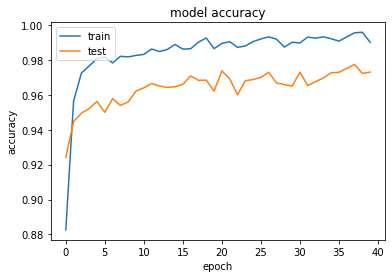

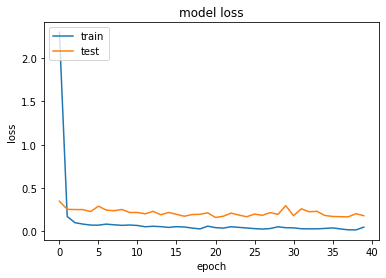

In [25]:
params = grid_result.best_params_


model = create_model(optimizer=params["optimizer"],activation=params["activation"], dropout=params["dropout"])
    
    


history = model.fit(x_train,
                    Y_train,
                    batch_size=params["batch_size"],
                    epochs=40,
                    verbose = 2,
                    validation_data=(x_test, Y_test)
                    )
model.summary()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()